Overfitting is disadvantage of decision tree<br>
We use random forest to overcome this<br>
Random forest is like a combination of decision trees

To read csv file

In [1]:
import pandas as pd
# For splitting between training and testing
from sklearn.model_selection import train_test_split
# Importing Algorithm
from sklearn.ensemble import RandomForestClassifier
# For checking/Evaluating accuracy of model and printing the confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
# For Plotting
import matplotlib.pyplot as plt
# For dimension reduction
from sklearn.decomposition import PCA
# For converting string to int
from sklearn.preprocessing import LabelEncoder
# For Saving model as pkl file
import joblib

Car dataset<br>
Six input attributes:<br>
1. buying- Buying Level or Capacity of the Customer(Very High:vhigh, High:high, Low:low, Medium:med)
2. maint-Maintenence Level(Very High:vhigh, High:high, Low:low, Medium:med)
3. doors- Number of doors in car(2,3,4 and 5 or more)
4. persons- Capacity in terms of persons to carry(2,4 and more)
5. lug_boot- The size of Luggage Boot(small,med,big)
6. safety-Safety Level of Car(high,med,low)
<br><br>
Output Class Values:<br>
0- unacc-Unacceptable<br>
1- acc-Acceptable<br>
2- good-Good Condition<br>
3- vgood- Very Good Condition<br>

In [2]:
df=pd.read_csv("car_evaluation.csv")
print("Dataframe is:\n",df)
print("\nColumns in dataframe are:",df.columns)
print("\nInformation about Dataframe is:\n")
print(df.info)

Dataframe is:
       vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]

Columns in dataframe are: Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

Information about Dataframe is:

<bound method DataFrame.info of       vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  hig

For converting string columns to numeric values

In [3]:
le= LabelEncoder()

Function to convert string values to numeric values

In [4]:
func = lambda i:le.fit(df[i]).transform(df[i])
for i in df.columns:
    df[i]=func(i)

Printing Updated Dataframe

In [5]:
print("Updated Dataframe is:")
print(df)
# Renaming columns
df.rename(columns={"vhigh":"buying_capacity","vhigh.1":"Maintenence","2":"Doors","2.1":"No_of_Persons","small":"Luggage_Boot","low":"Safety","unacc":"Target_Class"},inplace=True)
# Printing Final Dataset
print("\nFinal Dataset is:")
print(df)

Updated Dataframe is:
      vhigh  vhigh.1  2  2.1  small  low  unacc
0         3        3  0    0      2    2      2
1         3        3  0    0      2    0      2
2         3        3  0    0      1    1      2
3         3        3  0    0      1    2      2
4         3        3  0    0      1    0      2
...     ...      ... ..  ...    ...  ...    ...
1722      1        1  3    2      1    2      1
1723      1        1  3    2      1    0      3
1724      1        1  3    2      0    1      2
1725      1        1  3    2      0    2      1
1726      1        1  3    2      0    0      3

[1727 rows x 7 columns]

Final Dataset is:
      buying_capacity  Maintenence  Doors  No_of_Persons  Luggage_Boot  \
0                   3            3      0              0             2   
1                   3            3      0              0             2   
2                   3            3      0              0             1   
3                   3            3      0              0      

Input and Output data

In [6]:
X,Y=df.drop(["Target_Class"],axis=1),df['Target_Class']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,shuffle=False)
print("Shape of training test data:",x_test.shape,"\nShape of training test data:",y_test.shape,"\n")

Shape of training test data: (346, 6) 
Shape of training test data: (346,) 



Choosing algorithm<br>
Model is not good enough(not giving accuracy for by default parameters), so we need to change pararmeters

In [8]:
dt=RandomForestClassifier(1000,criterion="entropy",max_depth=10)
# Training Model
dt.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=1000)

Evaluating/Testing the model

In [9]:
print("Training Accuracy is:",dt.score(x_train,y_train)*100)
predict=dt.predict(x_test)
print("\nPredicted Data is:\n",predict)
print("\nTesting Accuracy is:",accuracy_score(y_test,predict)*100)
print("\nConfusion Matrix is:\n",confusion_matrix(y_test,predict))

Training Accuracy is: 99.9275887038378

Predicted Data is:
 [2 2 2 2 2 2 0 2 0 0 2 0 0 2 2 0 2 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0
 2 0 0 2 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 0 2 2 0 2 0 0 2
 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 0 0 2 2 0 2 0 0 2 0 0 2 2 2 2 2 2 2 2
 2 2 2 0 2 0 0 2 0 0 2 2 0 2 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 0
 2 2 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 0 2 2 0 2 0 0 2 0 0 2
 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 0 0 2 2 0 2 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2
 0 2 0 0 2 0 0 2 2 0 2 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 0 2 2 2
 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 0 0 2 2 0 2 0 0 2 0 0 2 2 2 2
 2 2 2 2 2 2 2 0 2 0 0 2 0 0 2 2 0 2 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0
 0 2 0 0 2 2 0 2 0 0 2 0 0]

Testing Accuracy is: 66.76300578034682

Confusion Matrix is:
 [[ 33   0  30   0]
 [ 46   0   0   0]
 [  0   0 198   0]
 [ 39   0   0   0]]


Doing PCA(Principle component analysis) to reduce dimensions

In [10]:
x=PCA(n_components=3)
pca_data=x.fit_transform(X)
# Transforming data
pca_data=x.fit_transform(X)
print("Transforming data\n",x.fit_transform(X))
print("\nShape of Transformed data is:",pca_data.shape)
print("\nTransformed Data is:")
print(pca_data)

Transforming data
 [[ 4.68219671e-13  2.09011595e-13  2.59437792e+00]
 [ 4.67491893e-13  2.11588331e-13  2.59437792e+00]
 [ 4.69022722e-13  2.06778647e-13  2.59696903e+00]
 ...
 [ 7.07106781e-01 -4.08248290e-01 -1.43668238e+00]
 [ 7.07106781e-01 -4.08248290e-01 -1.43668238e+00]
 [ 7.07106781e-01 -4.08248290e-01 -1.43668238e+00]]

Shape of Transformed data is: (1727, 3)

Transformed Data is:
[[ 7.64750487e-14  3.90478808e-13  2.59437792e+00]
 [ 7.69831441e-14  3.88369542e-13  2.59437792e+00]
 [ 7.82591726e-14  3.92153733e-13  2.59696903e+00]
 ...
 [ 4.08248290e-01  7.07106781e-01 -1.43668238e+00]
 [ 4.08248290e-01  7.07106781e-01 -1.43668238e+00]
 [ 4.08248290e-01  7.07106781e-01 -1.43668238e+00]]


Plotting

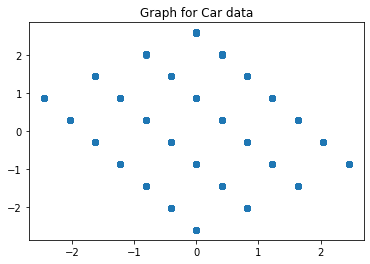

In [11]:
plt.scatter(pca_data[:,0],pca_data[:,2])
plt.title("Graph for Car data")
plt.show()

Saving model to disk

In [12]:
# Save the model
joblib.dump(dt, 'model.pkl')

['model.pkl']